In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file = 'CreditScoring.csv'

In [3]:
df = pd.read_csv(file)
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.replace(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.replace(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.replace(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.replace(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.replace(job_values)


In [6]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [10]:
df[['income', 'assets', 'debt']] = df[['income', 'assets', 'debt']].replace(99999999, np.nan)


In [11]:
df = df[df.status != 'unk'].reset_index(drop=True)
df = df.fillna(0)

In [12]:
status_values = {
    'ok':0,
    'default':1,
}
df.status = df.status.replace(status_values).astype(int)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,0,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,1,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,0,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [13]:
target = df.status
data = df.drop(columns=['status'])

In [14]:
categoricalCols = ['home', 'marital', 'records', 'job']
numericalCols = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
allCols = categoricalCols + numericalCols

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

catPreprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', catPreprocessor, categoricalCols)],remainder="passthrough")

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, DecisionTreeClassifier())

In [19]:
model.fit(dfTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home', 'marital', 'records',
                                                   'job'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
from sklearn.metrics import roc_auc_score
yValPred = model.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
print(f'Val AUC: {roc_auc_score(yVal, yValPred)}')

yTrainPred = model.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Train AUC: {roc_auc_score(yTrain, yTrainPred)}')

Val prediction: [1. 1. 0. ... 0. 0. 1.]
Val AUC: 0.6494502127258371
Train prediction: [1. 0. 1. ... 0. 0. 1.]
Train AUC: 1.0


Model is overfitting. Let's change the depth of the tree to 3.

In [21]:
model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=3))
model.fit(dfTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home', 'marital', 'records',
                                                   'job'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

yValPred = model.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
aucVal = roc_auc_score(yVal, yValPred)
print(f'Val AUC: {aucVal}')
yTrainPred = model.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Train AUC: {roc_auc_score(yTrain, yTrainPred)}')

Val prediction: [0.39529915 0.12840853 0.12840853 ... 0.10526316 0.12840853 0.61386139]
Val AUC: 0.739853782905721
Train prediction: [0.61596958 0.39529915 0.61386139 ... 0.12840853 0.12840853 0.39529915]
Train AUC: 0.7619636991251401


In [23]:
model2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=1))
model2.fit(dfTrain, yTrain)
from sklearn.metrics import roc_auc_score
yValPred = model2.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
aucVal = roc_auc_score(yVal, yValPred)
print(f'Val AUC: {aucVal}')
yTrainPred = model2.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Train AUC: {roc_auc_score(yTrain, yTrainPred)}')

Val prediction: [0.21973256 0.21973256 0.21973256 ... 0.21973256 0.21973256 0.56719023]
Val AUC: 0.6014641351702789
Train prediction: [0.21973256 0.21973256 0.56719023 ... 0.21973256 0.21973256 0.21973256]
Train AUC: 0.6226529357256055


In [24]:
names = list(model2.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out(categoricalCols)) + numericalCols
names
print(export_text(model2['decisiontreeclassifier'], feature_names=names))

|--- records_no <= 0.50
|   |--- class: 1
|--- records_no >  0.50
|   |--- class: 0



In [25]:
model2.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out(categoricalCols)

array(['home_ignore', 'home_other', 'home_owner', 'home_parents',
       'home_private', 'home_rent', 'home_unk', 'marital_divorced',
       'marital_married', 'marital_separated', 'marital_single',
       'marital_unk', 'marital_widow', 'records_no', 'records_yes',
       'job_fixed', 'job_freelance', 'job_others', 'job_partime',
       'job_unk'], dtype=object)

In [26]:
model3 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=2))
model3.fit(dfTrain, yTrain)
from sklearn.metrics import roc_auc_score
yValPred = model3.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
aucVal = roc_auc_score(yVal, yValPred)
print(f'Val AUC: {aucVal}')
yTrainPred = model3.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Train AUC: {roc_auc_score(yTrain, yTrainPred)}')

Val prediction: [0.17867203 0.17867203 0.17867203 ... 0.58156028 0.17867203 0.70180723]
Val AUC: 0.6624278637454675
Train prediction: [0.58156028 0.17867203 0.70180723 ... 0.17867203 0.17867203 0.17867203]
Train AUC: 0.6972613817060012


In [27]:
names = list(model3.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out(categoricalCols)) + numericalCols
names
print(export_text(model3['decisiontreeclassifier'], feature_names=names))

|--- records_yes <= 0.50
|   |--- job_partime <= 0.50
|   |   |--- class: 0
|   |--- job_partime >  0.50
|   |   |--- class: 1
|--- records_yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



#### Decision Trees

In [28]:
depth = [1,2,3,4,5,6,10,15,20, None]

for d in depth:
    dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=d))
    dt.fit(dfTrain, yTrain)

    yValPred = dt.predict_proba(dfVal)[:,1]
    auc = round(roc_auc_score(yVal, yValPred),3)
    
    print(f'Depth: {d}, auc: {auc}')   

Depth: 1, auc: 0.601
Depth: 2, auc: 0.662
Depth: 3, auc: 0.74
Depth: 4, auc: 0.78
Depth: 5, auc: 0.782
Depth: 6, auc: 0.779
Depth: 10, auc: 0.684
Depth: 15, auc: 0.659
Depth: 20, auc: 0.662
Depth: None, auc: 0.654


In [29]:
scores = []

depth = [4,5,6,7,10,15,20,None]

leaves = [1,2,5,10,15,20,100,200,500]

for d in depth:
    
    for l in leaves:
        
        dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=d, min_samples_leaf=l))
        dt.fit(dfTrain, yTrain)
    
        yValPred = dt.predict_proba(dfVal)[:,1]
        auc = round(roc_auc_score(yVal, yValPred),3)
        scores.append([d, l, auc])
        #print(f'Depth: {d}, Leaves: {l}, auc: {auc}')   

In [30]:
dfScores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
#dfScores.sort_values(by='auc', ascending=False)

In [31]:
dfScoresPivot = dfScores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
dfScoresPivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.651  0.781  0.782  0.780  0.751  0.680  0.683  0.665
2                 0.673  0.781  0.783  0.782  0.756  0.690  0.683  0.671
5                 0.715  0.781  0.784  0.780  0.770  0.725  0.718  0.718
10                0.757  0.779  0.785  0.779  0.776  0.748  0.751  0.755
15                0.772  0.779  0.784  0.777  0.776  0.769  0.773  0.768
20                0.783  0.778  0.783  0.784  0.786  0.788  0.783  0.778
100               0.791  0.770  0.779  0.788  0.792  0.791  0.791  0.791
200               0.783  0.770  0.783  0.783  0.783  0.783  0.783  0.783
500               0.729  0.729  0.729  0.729  0.729  0.729  0.729  0.729

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

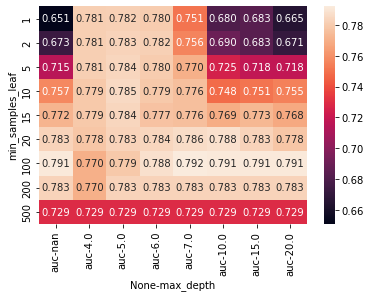

In [32]:
sns.heatmap(dfScoresPivot, annot=True, fmt='.3f')

In [33]:
dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, min_samples_leaf=20))
dt.fit(dfTrain, yTrain)
yValPred = dt.predict_proba(dfVal)[:,1]
auc = round(roc_auc_score(yVal, yValPred),3)
auc

0.783

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=10, random_state=1))
RF.fit(dfTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home', 'marital', 'records',
                                                   'job'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10, random_state=1))])

In [36]:
yValPred = RF.predict_proba(dfVal)[:,1]

In [37]:
roc_auc_score(yVal, yValPred)

0.7927956064159527

In [38]:
dfVal.reset_index(drop=True, inplace=True)

In [39]:
RF.predict_proba(dfVal[0:1])

array([[0.4, 0.6]])

In [40]:
scores = []
for n in range(10, 201, 10):
    RF = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=n, random_state=1))
    RF.fit(dfTrain, yTrain)
    yValPred = RF.predict_proba(dfVal)[:,1]
    auc = roc_auc_score(yVal, yValPred)
    scores.append([n, auc])

In [41]:
dfScores = pd.DataFrame(scores, columns=['n_stimators', 'auc'])

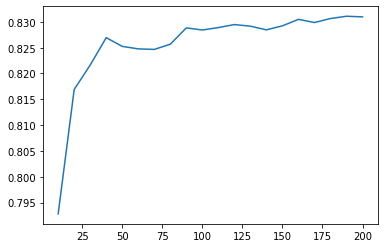

In [42]:
_ = plt.plot(dfScores.n_stimators, dfScores.auc)

In [43]:
scores = []

for d in [5,10,15, 50, 100]:
    for n in range(10, 201, 10):
        RF = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1))
        RF.fit(dfTrain, yTrain)
        yValPred = RF.predict_proba(dfVal)[:,1]
        auc = roc_auc_score(yVal, yValPred)
        scores.append([d, n, auc])

In [44]:
dfScores = pd.DataFrame(scores, columns=['max_depth', 'n_stimators', 'auc'])

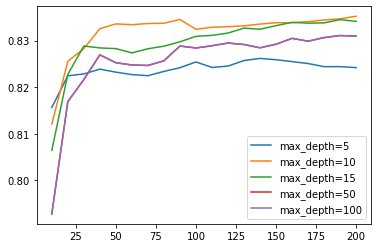

In [45]:
for d in [5,10,15, 50, 100]:
    dfSubset = dfScores[dfScores.max_depth == d]
    plt.plot(dfSubset.n_stimators, dfSubset.auc ,label = f'max_depth={d}')
                 
_ = plt.legend()                 

In [46]:
max_depth = 10

In [47]:
scores = []

for l in [1,3,5,10,50]:
    for n in range(10, 201, 10):
        RF = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=n, 
                                                                max_depth=max_depth,
                                                                min_samples_leaf=l,
                                                                random_state=1,
                                                                n_jobs=-1))
        RF.fit(dfTrain, yTrain)
        yValPred = RF.predict_proba(dfVal)[:,1]
        auc = roc_auc_score(yVal, yValPred)
        scores.append([l, n, auc])

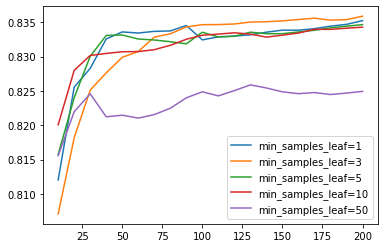

In [48]:
dfScores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_stimators', 'auc'])
for l in [1,3,5,10,50]:
    dfSubset = dfScores[dfScores.min_samples_leaf == l]
    plt.plot(dfSubset.n_stimators, dfSubset.auc ,label = f'min_samples_leaf={l}')
                 
_ = plt.legend()                 

In [49]:
min_samples_leaf = 3

In [50]:
RF = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, 
                                                        max_depth=max_depth,
                                                        min_samples_leaf=min_samples_leaf,
                                                        random_state=1,
                                                       n_jobs=-1))
RF.fit(dfTrain, yTrain)
yValPred = RF.predict_proba(dfVal)[:,1]
auc = roc_auc_score(yVal, yValPred)
auc

0.8346434730684769

#### Gradient Boosting and XGBoost

In [51]:
import xgboost as xgb
dfTrainNew = dfTrain.copy()
dfValNew = dfVal.copy()

In [52]:
for col in categoricalCols:
    dfTrainNew[col] = dfTrainNew[col].astype("category")
    dfValNew[col] = dfValNew[col].astype("category")

In [53]:
dTrain = xgb.DMatrix(dfTrainNew, yTrain, enable_categorical=True)
dVal = xgb.DMatrix(dfValNew, yVal, enable_categorical=True)

In [54]:
xgbParams = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthreads': 8,
    
    'seed': 1,
    'verbosity': 1,
}

modelxgb = xgb.train(xgbParams, dTrain, num_boost_round=10)

[16:34:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [55]:
yValPred = modelxgb.predict(dVal)

In [56]:
roc_auc_score(yVal, yValPred)

0.8305598441189065

In [57]:
watchlist = [(dTrain, 'train'), (dVal, 'val')]

In [58]:
%%capture output

xgbParams = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthreads': 8,
    
    'seed': 1,
    'verbosity': 0,
}
modelxgb = xgb.train(xgbParams, dTrain, evals=watchlist, num_boost_round=200, verbose_eval=5)

In [59]:
s = output.stdout
s

'[0]\ttrain-auc:0.85035\tval-auc:0.77839\n[5]\ttrain-auc:0.91763\tval-auc:0.82582\n[10]\ttrain-auc:0.93863\tval-auc:0.83174\n[15]\ttrain-auc:0.95722\tval-auc:0.82962\n[20]\ttrain-auc:0.96818\tval-auc:0.82923\n[25]\ttrain-auc:0.97606\tval-auc:0.82568\n[30]\ttrain-auc:0.98305\tval-auc:0.82383\n[35]\ttrain-auc:0.98459\tval-auc:0.82252\n[40]\ttrain-auc:0.98815\tval-auc:0.82196\n[45]\ttrain-auc:0.99134\tval-auc:0.82024\n[50]\ttrain-auc:0.99429\tval-auc:0.81864\n[55]\ttrain-auc:0.99569\tval-auc:0.81762\n[60]\ttrain-auc:0.99674\tval-auc:0.81638\n[65]\ttrain-auc:0.99759\tval-auc:0.81271\n[70]\ttrain-auc:0.99806\tval-auc:0.81112\n[75]\ttrain-auc:0.99905\tval-auc:0.80925\n[80]\ttrain-auc:0.99937\tval-auc:0.81066\n[85]\ttrain-auc:0.99952\tval-auc:0.80939\n[90]\ttrain-auc:0.99970\tval-auc:0.81010\n[95]\ttrain-auc:0.99987\tval-auc:0.81036\n[100]\ttrain-auc:0.99995\tval-auc:0.81023\n[105]\ttrain-auc:0.99998\tval-auc:0.81022\n[110]\ttrain-auc:0.99998\tval-auc:0.81024\n[115]\ttrain-auc:0.99999\tval-au

In [60]:
import regex
newString = regex.findall(r'.*\[(\d+)\].*:(0.\d+).*:(0.\d+).*', s)
dfScores = pd.DataFrame(newString, columns=['iteration','train-auc', 'val-auc'])
#dfScores['iteration'] = dfScores['iteration'].astype(int)
#dfScores[['train-auc', 'val-auc']] = dfScores[['train-auc', 'val-auc']].astype(float)
dfScores =  dfScores.astype(float)

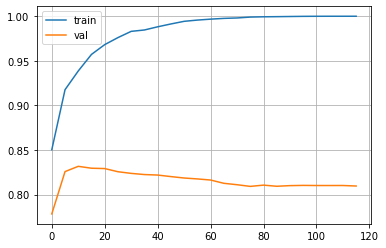

In [61]:
plt.plot(dfScores['iteration'], dfScores['train-auc'], label='train')
plt.plot(dfScores['iteration'], dfScores['val-auc'], label='val')
plt.legend()
plt.grid()
_ = plt.show()

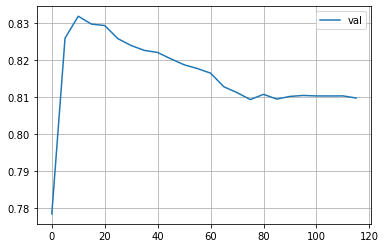

In [62]:
plt.plot(dfScores['iteration'], dfScores['val-auc'], label='val')
plt.legend()
plt.grid()
_ = plt.show()

#### XGBoost Parameter Tuning

In [63]:
scores = {}

In [64]:
%%capture output

eta = 0.01
xgbParams = {
    'eta': eta,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthreads': 8,

    'seed': 1,
    'verbosity': 0,
}
modelxgb = xgb.train(xgbParams, dTrain, evals=watchlist, num_boost_round=200, verbose_eval=5)

In [65]:
s = output.stdout

In [66]:
newString = regex.findall(r'.*\[(\d+)\].*:(\d.\d+).*:(\d.\d+).*', s)
dfScores = pd.DataFrame(newString, columns=['iteration','train-auc', 'val-auc'])
dfScores =  dfScores.astype(float)
scores[f'eta={eta}'] = dfScores
scores

{'eta=0.01':     iteration  train-auc  val-auc
 0         0.0    0.85035  0.77839
 1         5.0    0.85281  0.78325
 2        10.0    0.85467  0.78280
 3        15.0    0.86462  0.79359
 4        20.0    0.86802  0.79862
 5        25.0    0.87144  0.80354
 6        30.0    0.87503  0.80704
 7        35.0    0.87758  0.80867
 8        40.0    0.87987  0.80953
 9        45.0    0.88121  0.81137
 10       50.0    0.88427  0.81355
 11       55.0    0.88651  0.81550
 12       60.0    0.88938  0.81710
 13       65.0    0.89169  0.81808
 14       70.0    0.89345  0.81883
 15       75.0    0.89488  0.81938
 16       80.0    0.89614  0.82004
 17       85.0    0.89802  0.82176
 18       90.0    0.89990  0.82313
 19       95.0    0.90136  0.82445
 20      100.0    0.90283  0.82476
 21      105.0    0.90438  0.82492
 22      110.0    0.90551  0.82520
 23      115.0    0.90698  0.82572
 24      120.0    0.90828  0.82646
 25      125.0    0.90935  0.82694
 26      130.0    0.91038  0.82743
 27     

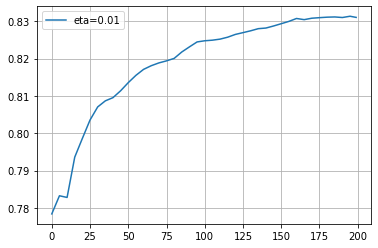

In [67]:
for key, dfScore in scores.items():
    #print(key, dfScore)
    plt.plot(dfScore.iteration, dfScore['val-auc'], label=key)
    
plt.legend()
plt.grid()
_ = plt.show()

In [68]:
scores = {}

In [69]:
%%capture output

depth = 10
xgbParams = {
    'eta': 0.05,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthreads': 8,

    'seed': 1,
    'verbosity': 0,
}
modelxgb = xgb.train(xgbParams, dTrain, evals=watchlist, num_boost_round=200, verbose_eval=5)

In [70]:
s = output.stdout
newString = regex.findall(r'.*\[(\d+)\].*:(\d.\d+).*:(\d.\d+).*', s)
dfScores = pd.DataFrame(newString, columns=['iteration','train-auc', 'val-auc'])
dfScores =  dfScores.astype(float)
scores[f'max_depth={depth}'] = dfScores
scores

{'max_depth=10':     iteration  train-auc  val-auc
 0         0.0    0.90790  0.77540
 1         5.0    0.93355  0.78978
 2        10.0    0.94954  0.79611
 3        15.0    0.95995  0.80090
 4        20.0    0.96856  0.80686
 5        25.0    0.97708  0.81167
 6        30.0    0.98198  0.81239
 7        35.0    0.98585  0.81248
 8        40.0    0.98895  0.81326
 9        45.0    0.99107  0.81181
 10       50.0    0.99282  0.81144
 11       55.0    0.99412  0.81178
 12       60.0    0.99549  0.81260
 13       65.0    0.99637  0.81212
 14       70.0    0.99703  0.81359
 15       75.0    0.99756  0.81292
 16       80.0    0.99806  0.81286
 17       85.0    0.99849  0.81391
 18       90.0    0.99872  0.81362
 19       95.0    0.99888  0.81402
 20      100.0    0.99903  0.81399
 21      105.0    0.99914  0.81374
 22      110.0    0.99927  0.81385
 23      115.0    0.99937  0.81327
 24      120.0    0.99950  0.81327
 25      125.0    0.99959  0.81277
 26      130.0    0.99968  0.81298
 27 

In [71]:
del scores['max_depth=10']

No handles with labels found to put in legend.


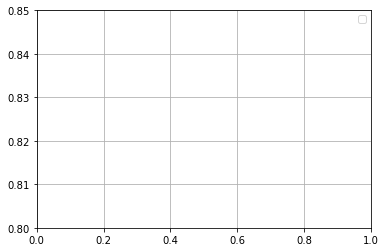

In [72]:
for key, dfScore in scores.items():
    #print(key, dfScore)
    plt.plot(dfScore.iteration, dfScore['val-auc'], label=key)
    
plt.legend()
plt.grid()
plt.ylim(0.8, 0.85)
_ = plt.show()

In [73]:
scores = {}

In [74]:
%%capture output

weight = 1
xgbParams = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': weight,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthreads': 8,

    'seed': 1,
    'verbosity': 0,
}
modelxgb = xgb.train(xgbParams, dTrain, evals=watchlist, num_boost_round=200, verbose_eval=5)

In [75]:
s = output.stdout
newString = regex.findall(r'.*\[(\d+)\].*:(\d.\d+).*:(\d.\d+).*', s)
dfScores = pd.DataFrame(newString, columns=['iteration','train-auc', 'val-auc'])
dfScores =  dfScores.astype(float)
scores[f'min_child_weight={weight}'] = dfScores
scores

{'min_child_weight=1':     iteration  train-auc  val-auc
 0         0.0    0.76631  0.73365
 1         5.0    0.79822  0.76490
 2        10.0    0.81783  0.79015
 3        15.0    0.82712  0.79854
 4        20.0    0.83305  0.80464
 5        25.0    0.83995  0.81042
 6        30.0    0.84513  0.81355
 7        35.0    0.84946  0.81530
 8        40.0    0.85381  0.81806
 9        45.0    0.85763  0.82167
 10       50.0    0.86118  0.82501
 11       55.0    0.86439  0.82703
 12       60.0    0.86681  0.82897
 13       65.0    0.86975  0.83138
 14       70.0    0.87253  0.83308
 15       75.0    0.87373  0.83427
 16       80.0    0.87530  0.83513
 17       85.0    0.87727  0.83594
 18       90.0    0.87873  0.83679
 19       95.0    0.88026  0.83822
 20      100.0    0.88147  0.83894
 21      105.0    0.88309  0.84020
 22      110.0    0.88483  0.84126
 23      115.0    0.88608  0.84196
 24      120.0    0.88728  0.84293
 25      125.0    0.88849  0.84339
 26      130.0    0.88970  0.8442

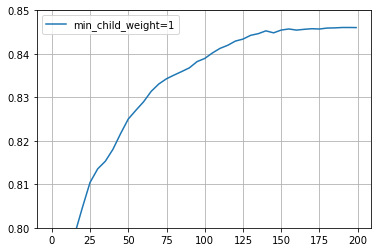

In [76]:
for key, dfScore in scores.items():
    #print(key, dfScore)
    plt.plot(dfScore.iteration, dfScore['val-auc'], label=key)
    
plt.legend()
plt.grid()
plt.ylim(0.8, 0.85)
_ = plt.show()

#### Final XGBoost  Model

In [77]:
scores = {}

In [78]:
%%capture output

xgbParams = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthreads': 8,
    'seed': 1,
    'verbosity': 0,
}
modelxgb = xgb.train(xgbParams, dTrain, evals=watchlist, num_boost_round=175, verbose_eval=5)

In [79]:
s = output.stdout
newString = regex.findall(r'.*\[(\d+)\].*:(\d.\d+).*:(\d.\d+).*', s)
dfScores = pd.DataFrame(newString, columns=['iteration','train-auc', 'val-auc'])
dfScores =  dfScores.astype(float)
scores[f'min_child_weight={weight}'] = dfScores
scores

{'min_child_weight=1':     iteration  train-auc  val-auc
 0         0.0    0.76631  0.73365
 1         5.0    0.79822  0.76490
 2        10.0    0.81783  0.79015
 3        15.0    0.82712  0.79854
 4        20.0    0.83305  0.80464
 5        25.0    0.83995  0.81042
 6        30.0    0.84513  0.81355
 7        35.0    0.84946  0.81530
 8        40.0    0.85381  0.81806
 9        45.0    0.85763  0.82167
 10       50.0    0.86118  0.82501
 11       55.0    0.86439  0.82703
 12       60.0    0.86681  0.82897
 13       65.0    0.86975  0.83138
 14       70.0    0.87253  0.83308
 15       75.0    0.87373  0.83427
 16       80.0    0.87530  0.83513
 17       85.0    0.87727  0.83594
 18       90.0    0.87873  0.83679
 19       95.0    0.88026  0.83822
 20      100.0    0.88147  0.83894
 21      105.0    0.88309  0.84020
 22      110.0    0.88483  0.84126
 23      115.0    0.88608  0.84196
 24      120.0    0.88728  0.84293
 25      125.0    0.88849  0.84339
 26      130.0    0.88970  0.8442

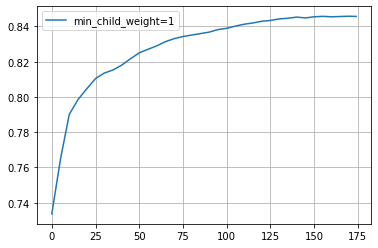

In [80]:
for key, dfScore in scores.items():
    #print(key, dfScore)
    plt.plot(dfScore.iteration, dfScore['val-auc'], label=key)
    
plt.legend()
plt.grid()
_ = plt.show()

#### Comparing models

In [82]:
dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, min_samples_leaf=20))
dt.fit(dfTrain, yTrain)
yValPred = dt.predict_proba(dfVal)[:,1]
auc = round(roc_auc_score(yVal, yValPred),4)
auc

0.7885

In [84]:
rf = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, 
                                                        max_depth=max_depth,
                                                        min_samples_leaf=min_samples_leaf,
                                                        random_state=1,
                                                       n_jobs=-1))
RF.fit(dfTrain, yTrain)
yValPred = RF.predict_proba(dfVal)[:,1]
auc = round(roc_auc_score(yVal, yValPred),4)
auc

0.8346

In [88]:
yValPred = modelxgb.predict(dVal)
auc = round(roc_auc_score(yVal, yValPred),4)
auc

0.8457

### Training Final Model

In [100]:
dfTrainFull.reset_index(drop=True, inplace=True)

In [101]:
dfTrainFull.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [109]:
import xgboost as xgb
TrainNew = dfTrainFull.copy()
TestNew = dfTest.copy()

for col in categoricalCols:
    TrainNew[col] = TrainNew[col].astype("category")
    TestNew[col] = TestNew[col].astype("category")

dTrain = xgb.DMatrix(TrainNew, yTrainFull, enable_categorical=True)
dVal = xgb.DMatrix(TestNew, yTest, enable_categorical=True)

In [112]:
xgbParams = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthreads': 8,
    'seed': 1,
    'verbosity': 1,
}
modelxgb = xgb.train(xgbParams, dTrain, num_boost_round=175)

[16:58:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [113]:
yTestPred = modelxgb.predict(dTest)
yTestPred[:10]
auc = round(roc_auc_score(yTest, yTestPred),4)
auc

0.8382